# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.7.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.7.1 on the current Colab Runtime...
2022-01-09 01:57:30 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.7/julia-1.7.1-linux-x86_64.tar.gz [123374573/123374573] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...
Installing Julia package CUDA...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.7

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.7.1
Commit ac5cc99908 (2021-12-22 19:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, haswell)
Environment:
  JULIA_NUM_THREADS = 2


In [ ]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  477.897 ms (2 allocations: 32.00 MiB)


In [ ]:
if ENV["COLAB_GPU"] == "1"
    using CUDA

    run(`nvidia-smi`)

    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
else
    println("No GPU found.")
end

Sun Jan  9 02:26:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
using Bloqade
using PythonCall
using KrylovKit
using SparseArrays

plt = pyimport("matplotlib.pyplot");

task 1

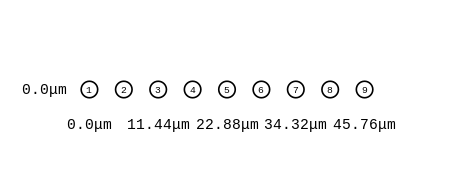

In [97]:
nsites = 9
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

In [98]:
Ω = 2π * 4
Δ_step = 30
Δ = LinRange(-2π * 10, 2π * 10, Δ_step);

In [99]:
density_g = zeros(Δ_step, nsites)

for ii in 1:Δ_step
    h_ii = rydberg_h(atoms; Δ = Δ[ii], Ω) # create the Rydberg Hamiltonian
    h_m = mat(h_ii) # convert the Hamiltonian into a matrix
    vals, vecs, info = KrylovKit.eigsolve(h_m, 1, :SR) # find the ground state eigenvalue and eigenvector
    g_state = ArrayReg(vecs[1]) # creates the initial state with all atoms in ``| 0 \rangle`` state

    for jj in 1:nsites
        density_g[ii, jj] = rydberg_density(g_state, jj) # measure the density of Rydberg excitations on each site
    end
end

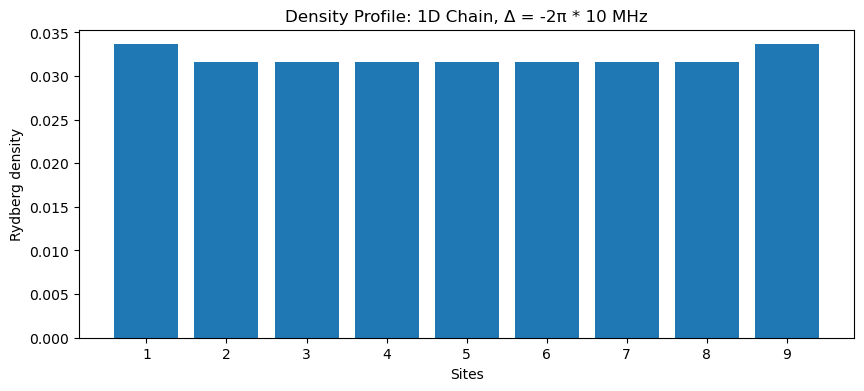

In [100]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[1, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = -2π * 10 MHz")
fig

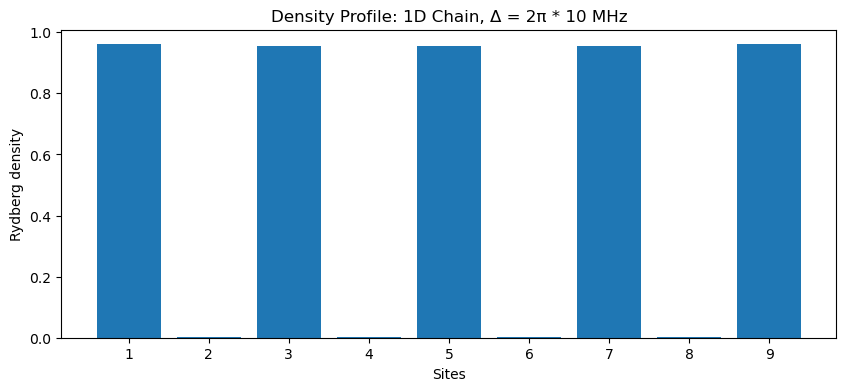

In [101]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[30, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = 2π * 10 MHz")
fig

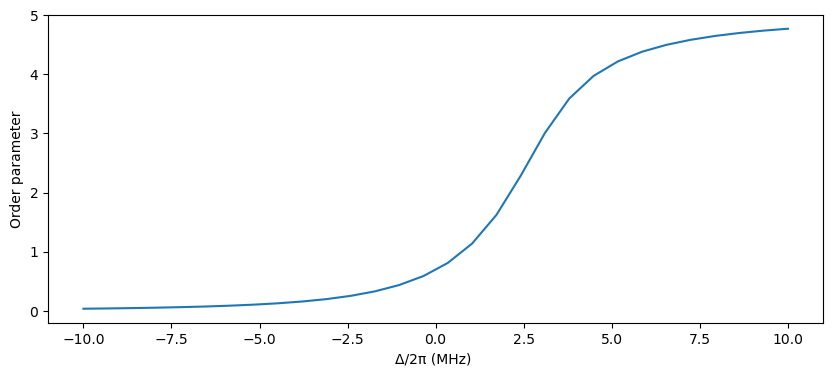

In [102]:
order_para = map(1:Δ_step) do ii
    return sum(density_g[ii, 1:2:nsites]) - sum(density_g[ii, 2:2:nsites])
end

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(Δ / 2π, order_para)
ax.set_xlabel("Δ/2π (MHz) ")
ax.set_ylabel("Order parameter")
fig

In [103]:
total_time = 3.0;
Ω_max = 2π * 4;
Ω = piecewise_linear(clocks = [0.0, 0.1, 2.1, 2.2, total_time], values = [0.0, Ω_max, Ω_max, 0, 0]);

In [104]:
U1 = -2π * 10;
U2 = 2π * 10;
Δ = piecewise_linear(clocks = [0.0, 0.6, 2.1, total_time], values = [U1, U1, U2, U2]);

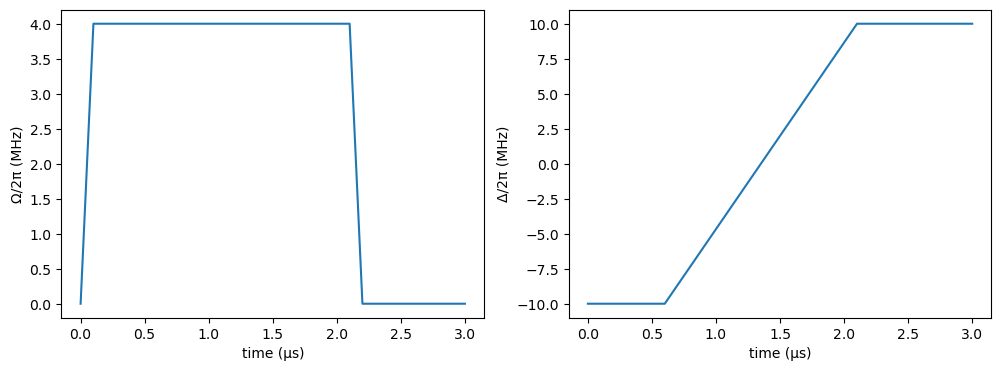

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

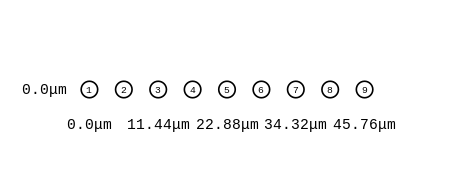

In [107]:
nsites = 9
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

In [108]:
h = rydberg_h(atoms; Δ, Ω)

nqubits: 9
+
├─ [+] ∑ 2π ⋅ 8.627e6.0/|r_i-r_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


In [110]:
reg = zero_state(9);
prob = SchrodingerProblem(reg, total_time, h);
integrator = init(prob, Vern8());

In [111]:
densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...);

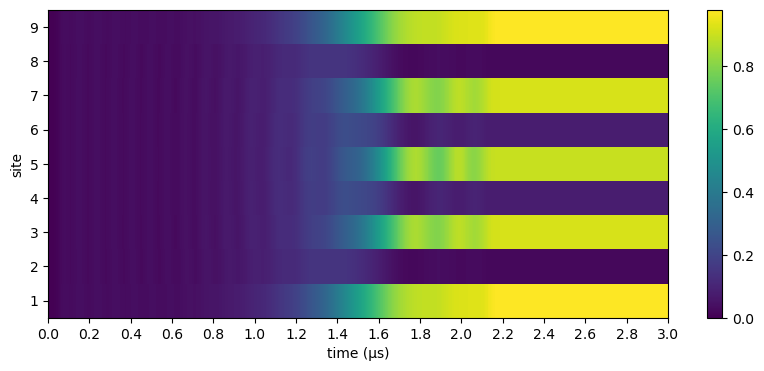

In [112]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

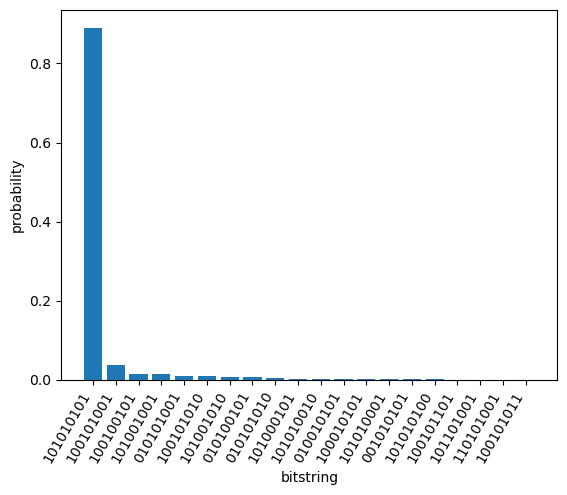

In [113]:
bitstring_hist(reg; nlargest = 20)

task 2 part a

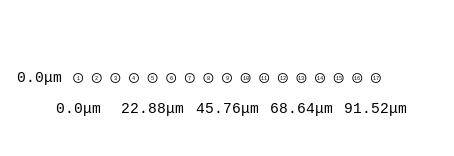

In [114]:
nsites = 17
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

In [115]:
Ω = 2π * 4
Δ_step = 30
Δ = LinRange(-2π * 10, 2π * 10, Δ_step);

In [116]:
density_g = zeros(Δ_step, nsites)

for ii in 1:Δ_step
    h_ii = rydberg_h(atoms; Δ = Δ[ii], Ω) # create the Rydberg Hamiltonian
    h_m = mat(h_ii) # convert the Hamiltonian into a matrix
    vals, vecs, info = KrylovKit.eigsolve(h_m, 1, :SR) # find the ground state eigenvalue and eigenvector
    g_state = ArrayReg(vecs[1]) # creates the initial state with all atoms in ``| 0 \rangle`` state

    for jj in 1:nsites
        density_g[ii, jj] = rydberg_density(g_state, jj) # measure the density of Rydberg excitations on each site
    end
end

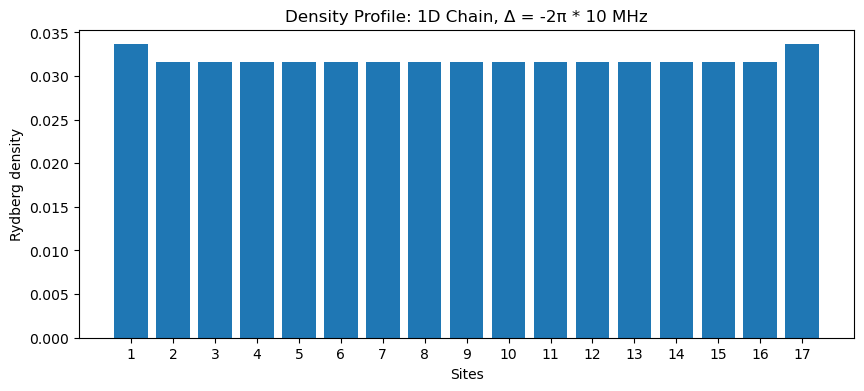

In [117]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[1, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = -2π * 10 MHz")
fig

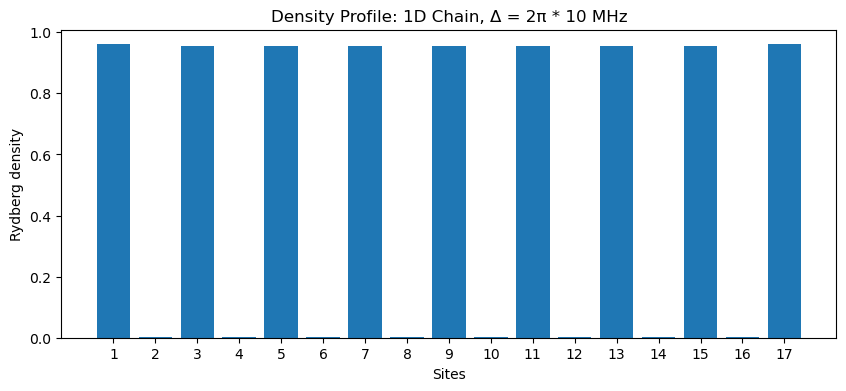

In [118]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[30, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = 2π * 10 MHz")
fig

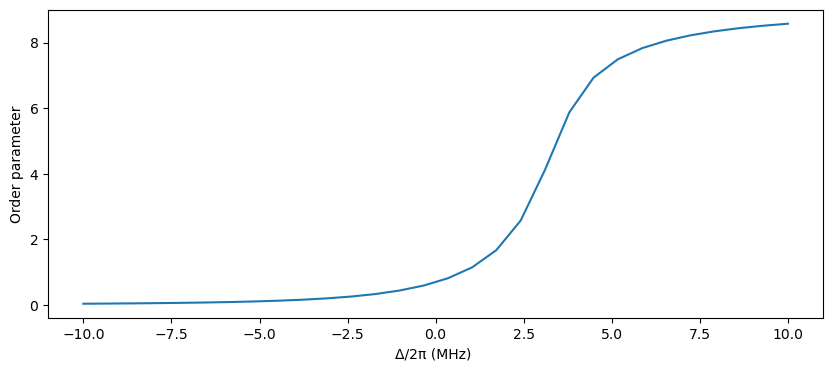

In [119]:
order_para = map(1:Δ_step) do ii
    return sum(density_g[ii, 1:2:nsites]) - sum(density_g[ii, 2:2:nsites])
end

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(Δ / 2π, order_para)
ax.set_xlabel("Δ/2π (MHz) ")
ax.set_ylabel("Order parameter")
fig

In [120]:
total_time = 3.0;
Ω_max = 2π * 4;
Ω = piecewise_linear(clocks = [0.0, 0.1, 2.1, 2.2, total_time], values = [0.0, Ω_max, Ω_max, 0, 0]);

In [121]:
U1 = -2π * 10;
U2 = 2π * 10;
Δ = piecewise_linear(clocks = [0.0, 0.6, 2.1, total_time], values = [U1, U1, U2, U2]);

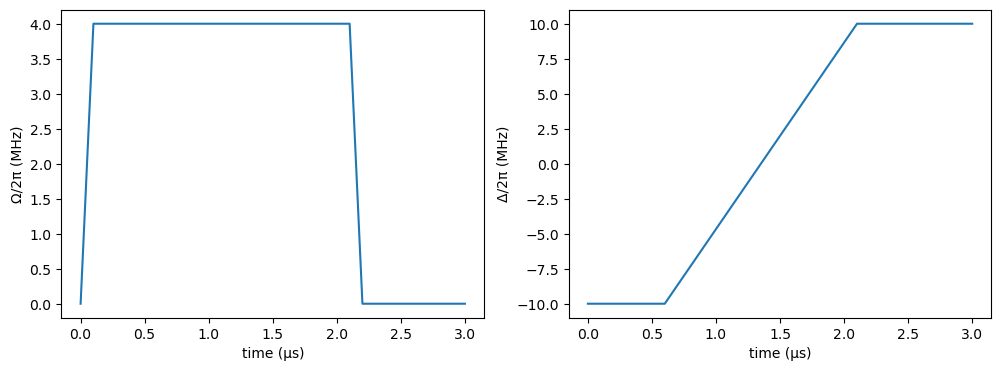

In [122]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

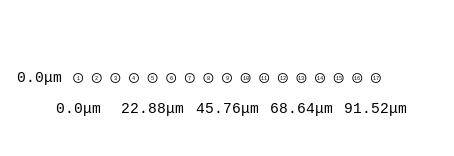

In [123]:
nsites = 17
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

In [124]:
h = rydberg_h(atoms; Δ, Ω)

nqubits: 17
+
├─ [+] ∑ 2π ⋅ 8.627e6.0/|r_i-r_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


In [125]:
reg = zero_state(17);
prob = SchrodingerProblem(reg, total_time, h);
integrator = init(prob, Vern8());

In [126]:
densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...);

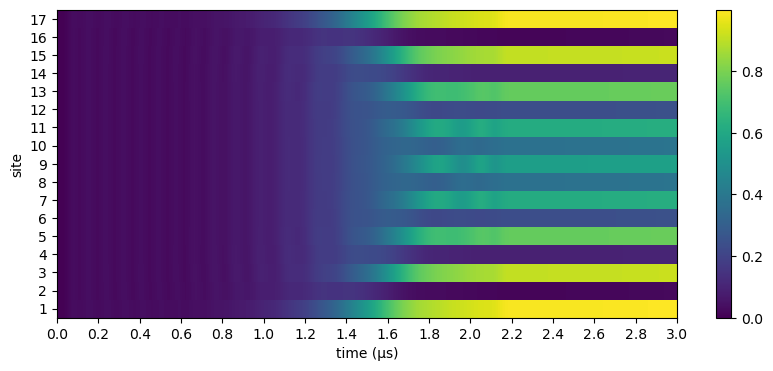

In [127]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

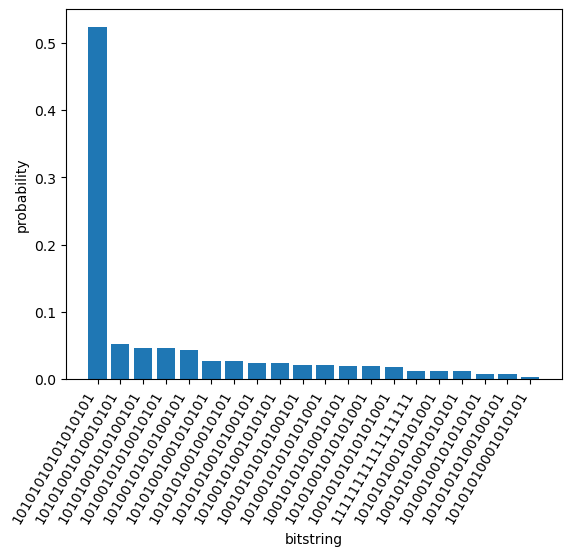

In [128]:
bitstring_hist(reg; nlargest = 20)

task 2 part b

In [129]:
space = blockade_subspace(atoms, 5.73);

In [130]:
reg = zero_state(space)

SubspaceArrayReg{2, ComplexF64, Vector{ComplexF64}, Subspace{Vector{Int64}}}(17, ComplexF64[1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im  …  0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im], Subspace{Vector{Int64}}(17, Dict(65808 => 2648, 42005 => 2364, 81928 => 3577, 66578 => 2739, 16464 => 1017, 17554 => 1176, 1090 => 168, 70805 => 3152, 32928 => 1645, 16980 => 1109…), [0, 1, 2, 4, 5, 8, 9, 10, 16, 17  …  87364, 87365, 87368, 87369, 87370, 87376, 87377, 87378, 87380, 87381]))

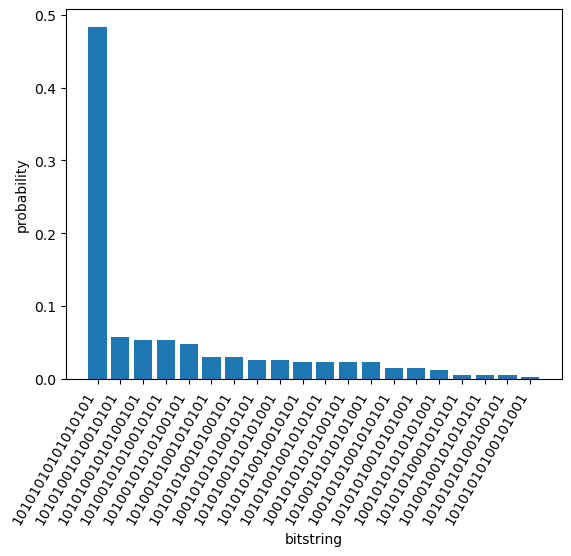

In [131]:
prob = SchrodingerProblem(reg, total_time, h)
emulate!(prob)
bitstring_hist(prob.reg; nlargest = 20)

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />